In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945909e+07,1.945909e+07,False,NaN,1,NaN,NaN,None,2023-08-16T15:43:00.000Z,29118.574632,1.374875e+10,15.4739,0.021104,-0.621566,-2.208357,-3.542987,10.145338,7.314602,5.666211e+11,49.2132,6.114901e+11,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
1,1027,Ethereum,ETH,ethereum,7234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201391e+08,1.201391e+08,True,NaN,2,NaN,NaN,None,2023-08-16T15:43:00.000Z,1820.997274,4.837787e+09,30.7188,-0.137265,-0.886935,-1.805731,-4.567280,5.391708,0.621478,2.187730e+11,19.0013,2.187730e+11,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
2,825,Tether USDt,USDT,tether,59509,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.318200e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.998723,2.391478e+10,28.8306,-0.015495,-0.002463,-0.098815,-0.133834,-0.071637,-0.130123,8.307581e+10,7.2151,8.657359e+10,None,2023-08-16T15:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-16 15:49:51.790735+00:00
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538525e+08,1.538525e+08,False,NaN,4,NaN,NaN,None,2023-08-16T15:43:00.000Z,233.203744,5.123412e+08,35.0664,-0.086212,-2.329804,-4.373244,-4.288317,-4.202979,-25.136830,3.587897e+10,3.1162,3.587897e+10,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
4,52,XRP,XRP,xrp,1029,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.278728e+10,9.998852e+10,False,NaN,5,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.595578,1.708700e+09,97.1493,-0.124463,-4.732624,-8.966690,-19.327820,24.387377,29.237668,3.143893e+10,2.7306,5.955777e+10,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
5,3408,USD Coin,USDC,usd-coin,13612,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.599678e+10,2.599678e+10,False,NaN,6,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.999981,3.031393e+09,14.7956,-0.018333,-0.008931,-0.026672,0.008654,0.000083,-0.007796,2.599628e+10,2.2578,2.599628e+10,None,2023-08-16T15:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-16 15:49:51.790735+00:00
6,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406142e+11,1.406142e+11,True,NaN,7,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.069280,4.595839e+08,41.2719,-0.172361,-6.108880,-7.834449,-0.470871,11.434740,-5.981101,9.741814e+09,0.8460,9.741814e+09,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
7,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504048e+10,3.607655e+10,False,NaN,8,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.274181,2.452235e+08,98.4479,-0.067011,-4.892998,-8.062968,-12.358422,3.110685,-26.609506,9.607449e+09,0.8344,1.233816e+10,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df, df2], ignore_index=True)



In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945909e+07,1.945909e+07,False,NaN,1,NaN,NaN,None,2023-08-16T15:43:00.000Z,29118.574632,1.374875e+10,15.4739,0.021104,-0.621566,-2.208357,-3.542987,10.145338,7.314602,5.666211e+11,49.2132,6.114901e+11,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
1,1027,Ethereum,ETH,ethereum,7234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201391e+08,1.201391e+08,True,NaN,2,NaN,NaN,None,2023-08-16T15:43:00.000Z,1820.997274,4.837787e+09,30.7188,-0.137265,-0.886935,-1.805731,-4.567280,5.391708,0.621478,2.187730e+11,19.0013,2.187730e+11,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
2,825,Tether USDt,USDT,tether,59509,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.318200e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.998723,2.391478e+10,28.8306,-0.015495,-0.002463,-0.098815,-0.133834,-0.071637,-0.130123,8.307581e+10,7.2151,8.657359e+10,None,2023-08-16T15:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-16 15:49:51.790735+00:00
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538525e+08,1.538525e+08,False,NaN,4,NaN,NaN,None,2023-08-16T15:43:00.000Z,233.203744,5.123412e+08,35.0664,-0.086212,-2.329804,-4.373244,-4.288317,-4.202979,-25.136830,3.587897e+10,3.1162,3.587897e+10,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
4,52,XRP,XRP,xrp,1029,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.278728e+10,9.998852e+10,False,NaN,5,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.595578,1.708700e+09,97.1493,-0.124463,-4.732624,-8.966690,-19.327820,24.387377,29.237668,3.143893e+10,2.7306,5.955777e+10,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
5,3408,USD Coin,USDC,usd-coin,13612,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.599678e+10,2.599678e+10,False,NaN,6,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.999981,3.031393e+09,14.7956,-0.018333,-0.008931,-0.026672,0.008654,0.000083,-0.007796,2.599628e+10,2.2578,2.599628e+10,None,2023-08-16T15:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-16 15:49:51.790735+00:00
6,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406142e+11,1.406142e+11,True,NaN,7,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.069280,4.595839e+08,41.2719,-0.172361,-6.108880,-7.834449,-0.470871,11.434740,-5.981101,9.741814e+09,0.8460,9.741814e+09,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
7,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504048e+10,3.607655e+10,False,NaN,8,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.274181,2.452235e+08,98.4479,-0.067011,-4.892998,-8.062968,-12.358422,3.110685,-26.609506,9.607449e+09,0.8344,1.233816e+10,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19459093.00000,19459093.00000,False,NaN,1,NaN,NaN,None,2023-08-16T15:43:00.000Z,29118.57463,13748753166.63031,15.47390,0.02110,-0.62157,-2.20836,-3.54299,10.14534,7.31460,566621051794.09509,49.21320,611490067274.77002,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
1,1027,Ethereum,ETH,ethereum,7234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120139112.96949,120139112.96949,True,NaN,2,NaN,NaN,None,2023-08-16T15:43:00.000Z,1820.99727,4837786972.90808,30.71880,-0.13726,-0.88693,-1.80573,-4.56728,5.39171,0.62148,218772997160.94434,19.00130,218772997160.94000,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
2,825,Tether USDt,USDT,tether,59509,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83182001730.36929,86684257831.22238,True,NaN,3,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.99872,23914782918.26152,28.83060,-0.01549,-0.00246,-0.09882,-0.13383,-0.07164,-0.13012,83075808054.96747,7.21510,86573593026.97000,None,2023-08-16T15:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-16 15:49:51.790735+00:00
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153852467.16979,153852467.16979,False,NaN,4,NaN,NaN,None,2023-08-16T15:43:00.000Z,233.20374,512341183.56786,35.06640,-0.08621,-2.32980,-4.37324,-4.28832,-4.20298,-25.13683,35878971378.80707,3.11620,35878971378.81000,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
4,52,XRP,XRP,xrp,1029,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52787284454.00000,99988519823.00000,False,NaN,5,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.59558,1708699516.50493,97.14930,-0.12446,-4.73262,-8.96669,-19.32782,24.38738,29.23767,31438931686.81077,2.73060,59557774210.20000,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
5,3408,USD Coin,USDC,usd-coin,13612,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25996778159.25611,25996778159.25611,False,NaN,6,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.99998,3031393217.42953,14.79560,-0.01833,-0.00893,-0.02667,0.00865,0.00008,-0.00780,25996282362.58018,2.25780,25996282362.58000,None,2023-08-16T15:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-16 15:49:51.790735+00:00
6,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140614206383.70523,140614206383.70523,True,NaN,7,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.06928,459583892.89623,41.27190,-0.17236,-6.10888,-7.83445,-0.47087,11.43474,-5.98110,9741814264.66583,0.84600,9741814264.67000,None,2023-08-16T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-16 15:49:51.790735+00:00
7,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35040482861.41700,36076551300.29000,False,NaN,8,NaN,NaN,None,2023-08-16T15:43:00.000Z,0.27418,245223512.38058,98.44790,-0.06701,-4.89300,-8.06297,-12.35842,3.11069,-26.60951,9607448553.72457,0

In [12]:
#Coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02789,-0.69342,-2.18957,-3.51704,10.14497,7.24500
Ethereum,-0.15144,-0.98269,-1.81687,-4.56862,5.30394,0.50898
Tether USDt,0.00627,0.02267,-0.07017,-0.12800,-0.07449,-0.11724
BNB,-0.10009,-2.37535,-4.40811,-4.31236,-4.20949,-25.17255
XRP,-0.17746,-4.79645,-9.17460,-19.41619,24.15747,29.20809
USD Coin,-0.00094,0.00606,-0.00467,0.00728,-0.00511,0.00772
Dogecoin,-0.28078,-6.21266,-7.96684,-0.60907,11.26207,-6.17327
Cardano,-0.15395,-4.97822,-8.15805,-12.45228,3.00032,-26.76700
Solana,-0.20879,-6.61745,-6.13037,-14.17470,47.39423,12.46966


In [13]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.02789
             quote.USD.percent_change_24h    -0.69342
             quote.USD.percent_change_7d     -2.18957
             quote.USD.percent_change_30d    -3.51704
             quote.USD.percent_change_60d    10.14497
             quote.USD.percent_change_90d     7.24500
Ethereum     quote.USD.percent_change_1h     -0.15144
             quote.USD.percent_change_24h    -0.98269
             quote.USD.percent_change_7d     -1.81687
             quote.USD.percent_change_30d    -4.56862
             quote.USD.percent_change_60d     5.30394
             quote.USD.percent_change_90d     0.50898
Tether USDt  quote.USD.percent_change_1h      0.00627
             quote.USD.percent_change_24h     0.02267
             quote.USD.percent_change_7d     -0.07017
             quote.USD.percent_change_30d    -0.12800
             quote.USD.percent_change_60d    -0.07449
             quote.USD.percent_change_90

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.02789
            quote.USD.percent_change_24h  -0.69342
            quote.USD.percent_change_7d   -2.18957
            quote.USD.percent_change_30d  -3.51704
            quote.USD.percent_change_60d  10.14497
            quote.USD.percent_change_90d   7.24500
Ethereum    quote.USD.percent_change_1h   -0.15144
            quote.USD.percent_change_24h  -0.98269
            quote.USD.percent_change_7d   -1.81687
            quote.USD.percent_change_30d  -4.56862
            quote.USD.percent_change_60d   5.30394
            quote.USD.percent_change_90d   0.50898
Tether USDt quote.USD.percent_change_1h    0.00627
            quote.USD.percent_change_24h   0.02267
            quote.USD.percent_change_7d   -0.07017
            quote.USD.percent_change_30d  -0.12800
            quote.USD.percent_change_60d  -0.07449
            quote.USD.percent_change_90d  -0.11724
BNB         quote.USD.percent_change_1h   -0.10009
            quote.USD.percent_change_24h  -2.37535
            quote.USD.percent_change_7d   -4.40811
            quote.USD.percent_change_30d  -4.31236
            quote.USD.percent_change_60d  -4.20949
            quote.USD.percent_change_90d -25.17255
XRP         quote.USD.percent_change_1h   -0.17746
            quote.USD.percent_change_24h  -4.79645
            quote.USD.percent_change_7d   -9.17460
            quote.USD.percent_change_30d -19.41619
            quote.USD.percent_change_60d  24.15747
            quote.USD.percent_change_90d  29.20809
USD Coin    quote.USD.percent_change_1h   -0.00094
            quote.USD.percent_change_24h   0.00606
            quote.USD.percent_change_7d   -0.00467
            quote.USD.percent_change_30d   0.00728
            quote.USD.percent_change_60d  -0.00511
            quote.USD.percent_change_90d   0.00772
Dogecoin    quote.USD.percent_change_1h   -0.28078
            quote.USD.percent_change_24h  -6.21266
            quote.USD.percent_change_7d   -7.96684
            quote.USD.percent_change_30d  -0.60907
            quote.USD.percent_change_60d  11.26207
            quote.USD.percent_change_90d  -6.17327
Cardano     quote.USD.percent_change_1h   -0.15395
            quote.USD.percent_change_24h  -4.97822
            quote.USD.percent_change_7d   -8.15805
            quote.USD.percent_change_30d -12.45228
            quote.USD.percent_change_60d   3.00032
            quote.USD.percent_change_90d -26.76700
Solana      quote.USD.percent_change_1h   -0.20879
            quote.USD.percent_change_24h  -6.61745
            quote.USD.percent_change_7d   -6.13037
            quote.USD.percent_change_30d -14.17470
            quote.USD.percent_change_60d  47.39423
            quote.USD.percent_change_90d  12.46966
TRON        quote.USD.percent_change_1h   -0.08360
            quote.USD.percent_change_24h  -1.89228
            quote.USD.percent_change_7d   -1.00134
            quote.USD.percent_change_30d  -5.04692
            quote.USD.percent_change_60d   6.29715
            quote.USD.percent_change_90d   7.08298
Polygon     quote.USD.percent_change_1h   -0.31261
            quote.USD.percent_change_24h  -6.69800
            quote.USD.percent_change_7d   -9.43951
            quote.USD.percent_change_30d -20.06758
            quote.USD.percent_change_60d   1.30227
            quote.USD.percent_change_90d -27.94831
Litecoin    quote.USD.percent_change_1h   -0.06152
            quote.USD.percent_change_24h  -4.15583
            quote.USD.percent_change_7d   -6.72068
            quote.USD.percent_change_30d -14.89388
            quote.USD.percent_change_60d   1.55550
            quote.USD.percent_change_90d -14.82535
Polkadot    quote.USD.percent_change_1h   -0.35401
            quote.USD.percent_change_24h  -4.64812
            quote.USD.percent_change_7d   -6.53212
            quote.USD.percent_change_30d -10.50513
            quote.USD.percent_change_60d   4.06378
            quo

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
#passing a column as an index for the dataframe
index = pd.Index(range(90))
                 
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02789
1,Bitcoin,quote.USD.percent_change_24h,-0.69342
2,Bitcoin,quote.USD.percent_change_7d,-2.18957
3,Bitcoin,quote.USD.percent_change_30d,-3.51704
4,Bitcoin,quote.USD.percent_change_60d,10.14497
5,Bitcoin,quote.USD.percent_change_90d,7.24500
6,Ethereum,quote.USD.percent_change_1h,-0.15144
7,Ethereum,quote.USD.percent_change_24h,-0.98269
8,Ethereum,quote.USD.percent_change_7d,-1.81687
9,Ethereum,quote.USD.percent_change_30d,-4.56862


In [17]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02789
1,Bitcoin,quote.USD.percent_change_24h,-0.69342
2,Bitcoin,quote.USD.percent_change_7d,-2.18957
3,Bitcoin,quote.USD.percent_change_30d,-3.51704
4,Bitcoin,quote.USD.percent_change_60d,10.14497
5,Bitcoin,quote.USD.percent_change_90d,7.24500
6,Ethereum,quote.USD.percent_change_1h,-0.15144
7,Ethereum,quote.USD.percent_change_24h,-0.98269
8,Ethereum,quote.USD.percent_change_7d,-1.81687
9,Ethereum,quote.USD.percent_change_30d,-4.56862


In [18]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.02789
1,Bitcoin,24h,-0.69342
2,Bitcoin,7d,-2.18957
3,Bitcoin,30d,-3.51704
4,Bitcoin,60d,10.14497
5,Bitcoin,90d,7.24500
6,Ethereum,1h,-0.15144
7,Ethereum,24h,-0.98269
8,Ethereum,7d,-1.81687
9,Ethereum,30d,-4.56862


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

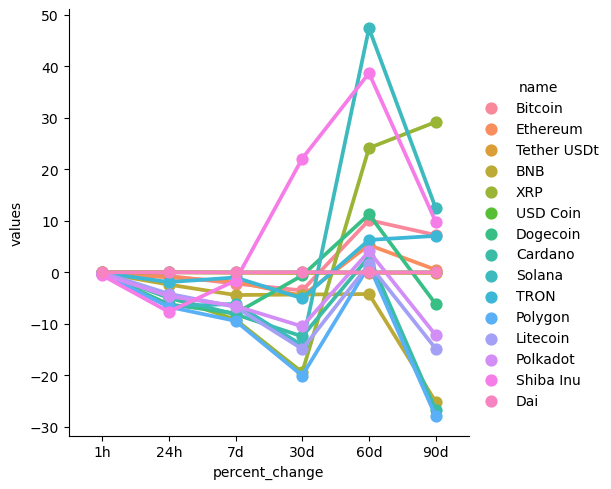

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [21]:
#creating a dataframe with specific columns

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29118.57463,2023-08-16 15:49:51.790735+00:00
15,Bitcoin,29109.37961,2023-08-16 15:51:12.083133+00:00
30,Bitcoin,29112.55373,2023-08-16 15:52:13.430040+00:00
45,Bitcoin,29111.80216,2023-08-16 15:53:13.882891+00:00
60,Bitcoin,29108.40707,2023-08-16 15:54:14.836873+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

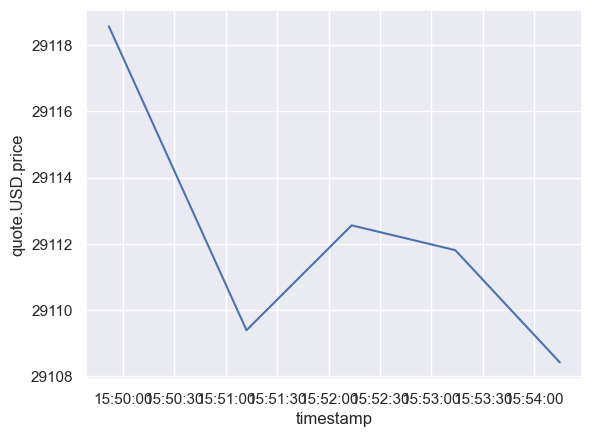

In [22]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)